# Introduction to the [Tensorflow](https://www.tensorflow.org/tutorials) framework with the Keras API. 

We will work with the MNIST dataset of hand-written digits. The main task is to recognise the digit wisible on image. We will perfomr following actions: 
* image classification using logistic regression 
* image classification using multi-layer dense neural networks
* examine various network depths, activation functions and optimizers

We will be using a high level [Keras](https://keras.io/getting_started/intro_to_keras_for_researchers/) Application Programming Interface (API)

# Environment preparation

* importing of necessary libraries
* if given library is not present in software environment it can be installed with "magic" commands:

```
! pip install matplotlib
```

In [1]:
#An eycandy colored text can be printer using package colored
from termcolor import colored

#The Tensorflow library 
import tensorflow as tf

#Package installation command
!pip install matplotlib

#The plotting library
from matplotlib import pyplot as plt

import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Data loading

* load the test data from a library of benchmark dataset
* print basic information on imported data

In [2]:
(DATA0, TARGET0), (DATA1, TARGET1) = tf.keras.datasets.mnist.load_data()

print(colored("The training dataset:","blue"))
print("Features. type: {}, shape: {}, min/max: {}/{}".format(type(DATA0), DATA0.shape, DATA0.min(), DATA0.max()))
print("Labels. type: {}, shape: {}, min/max: {}/{}".format(type(TARGET0), TARGET0.shape, TARGET0.min(), TARGET0.max()))

print("\n")
print(colored("The validation dataset:","blue"))
print("Features. type: {}, shape: {}, min/max: {}/{}".format(type(DATA1), DATA1.shape, DATA1.min(), DATA1.max()))
print("Labels. type: {}, shape: {}, min/max: {}/{}".format(type(TARGET1), TARGET1.shape, TARGET1.min(), TARGET1.max()))

The training dataset:
Features. type: <class 'numpy.ndarray'>, shape: (60000, 28, 28), min/max: 0/255
Labels. type: <class 'numpy.ndarray'>, shape: (60000,), min/max: 0/9


The validation dataset:
Features. type: <class 'numpy.ndarray'>, shape: (10000, 28, 28), min/max: 0/255
Labels. type: <class 'numpy.ndarray'>, shape: (10000,), min/max: 0/9


These are ordinary numpy arrays. There are 60 000 samples in the training dataset and 10 000 in the validation dataset. <br> The targets are integer numbers from 0 to 9 labeling the digits. The data are 28x28 grayscale images with values of type uint8, ranging from 0 to 255.

## Visual data inspection

* display the first image from the training dataset
* display 100th image from 
* find index of first image with "9" in the trainin dataset and display relevant image

Index of first "9" in the training dataset is 4


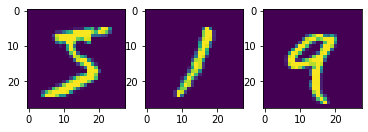

In [3]:
plt.subplot(131) #nrows ncolumns index
plt.imshow(DATA0[0]);

plt.subplot(132)
plt.imshow(DATA0[99]);

index  = np.argmax(TARGET0==9)
print("Index of first \"9\" in the training dataset is {}".format(index))

plt.subplot(133)
plt.imshow(DATA0[index]);

## <span style='color:red'> Please: </span> 

* plot image of the image of the first "7" in the validation dataset

Index of first "7" in the training dataset is 0


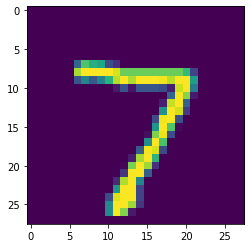

In [4]:
index  = np.argmax(TARGET1==7)
print("Index of first \"7\" in the training dataset is {}".format(index))
plt.imshow(DATA1[index]);

## Data preprocessing

Ofter tha input data has to be preprocessed to be useful in the training process. Dense networks take flat vectors of floating-point features and are best suited for inputs of the order of 1 rather than 255. 

* flatten images - change the 2D arrays into a 1D vector. Remember we have many such images, so the shape change is:

```
(nExamples, nX, nY) -> (nExamples, nX*nY)
```

* rescale the input values fo [0,1] range

In [5]:
(DATA0, TARGET0), (DATA1, TARGET1) = tf.keras.datasets.mnist.load_data()

print(colored("Before preprocessing.","blue"), "Pixel (14,14) from the first example of training data: {}".format(DATA0[0,14,14]))

DATA0 = DATA0.reshape(-1, 28 * 28)
DATA0 = DATA0.astype('float32')
DATA0 = DATA0/float(DATA0.max())

print(colored("After preprocessing.","blue"), "Pixel (14,14) from the first example of raining data: {}".format(DATA0[0,14*28+14]))

#Combine all sten into a single line
DATA1 = DATA1.reshape(-1, 28 * 28).astype('float32') / 255.

Before preprocessing. Pixel (14,14) from the first example of training data: 240
After preprocessing. Pixel (14,14) from the first example of raining data: 0.9411764740943909


## A logistic regression model

Suppose we have $I$ data samples of $J$ features each and want to classify them to $K$ classes. Let $X_{ij}$ denote feature $j$ of sample $i$. In logistic regression, we first calculate the logits: 

$$A_{ik}=b_k+\sum_jX_{ij}w_{jk}$$ 

where $b_k$ and $w_{jk}$ are called biases and weights. Then we calculate the probabilities that sample $i$ belongs to class $k$ according to the softmax formula: 

$$P_{ik}=\frac{\exp(A_{ik})}{\sum_{k'}\exp(A_{ik'})}$$ 

We then classify each sample to the class with the highest probability. The biases and weights are determined by training the classifier on a dataset $X_{ij}$ where sample $i$ belongs to class $k_i$. This is done by minimizing the cross-entropy loss 

$$L=-\sum_{ik}\delta_{kk_i}\log P_{ik}$$

by using a variant of stochastic gradient descent. 

Let us implement the above model using the Tensorflow Keras interface.

* the model is defines as a set of subsequent layers
* dense layer is a set of "neurons" that each take a vectorial input, and return a single value. With default setting this corresponds to $A_{i,j}$ with fixed j.
  The $k$ index runs over examples provided at the input
* we need a single neuron for each digi, to the dense layesr has size 10  
* the output of all neurons has to be normalised using the $P_{ik}$ formula - this is done by the ```tf.keras.layers.Softmax``` layer  

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()])

* the activation functions, like ```softmax```, ```sigmoid```, ```relu```, etc., can be treated as separate layers or equivalently added at the outputs of the dense layers:

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation = 'softmax')])

* the weighs of the model are now at some random values, sicne the model has not been trained yet, 
* we can pass the validation dataset, but the results will be random as well
* the result of the model is a 2D array(tensor): `(nExamples, nNeurons)`
* **Note** the output type is `tf.Tensor`. Sometimes is is necessary to cast it to numpy array (we will not use this today):

```
PROBABILITY1 = PROBABILITY1.numpy()
```

In [8]:
PROBABILITY1 = model(DATA1)

print(colored("Model output shape:","blue"),PROBABILITY1.shape)
print(colored("Digits probabilities for the first validation example:","blue"), PROBABILITY1[0])
print(colored("Maximum probability is for digit:","blue"), np.argmax(PROBABILITY1[0]))
print(colored("The first example label is:","blue"),TARGET1[0])

Model output shape: (10000, 10)
Digits probabilities for the first validation example: tf.Tensor(
[0.21558322 0.08525869 0.08913049 0.07516059 0.07457214 0.10881685
 0.09521854 0.13506848 0.0463438  0.07484721], shape=(10,), dtype=float32)
Maximum probability is for digit: 0
The first example label is: 7


## <span style='color:red'> Please: </span> 

Check if the probality normalisation is correct:

* use `tf.math.reduce_sum(input_tensor, axis)` function to sum all columns of the output probability for all the xemaples
* print the result for the first example

In [9]:
SUM1 = tf.math.reduce_sum(PROBABILITY1, axis=1)
print(colored("Sum of the probabilities for the first example:","blue"),SUM1[0])

Sum of the probabilities for the first example: tf.Tensor(1.0, shape=(), dtype=float32)


## <span style='color:red'> Please: </span> 

* create the model again print the probabilities for the first exmample in the cell below
* execute the cell a few times
* observe is the model output changes

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation = 'softmax')])

PROBABILITY1 = model(DATA1)

print(colored("Model output shape:","blue"),PROBABILITY1.shape)
print(colored("Digits probabilities for the first validation example:","blue"), PROBABILITY1[0])
print(colored("Maximum probability is for digit:","blue"), np.argmax(PROBABILITY1[0]))
print(colored("The first example label is:","blue"),TARGET1[0])

Model output shape: (10000, 10)
Digits probabilities for the first validation example: tf.Tensor(
[0.14555956 0.09103662 0.07428531 0.09402797 0.11239618 0.11938081
 0.07176305 0.05394069 0.16532145 0.0722884 ], shape=(10,), dtype=float32)
Maximum probability is for digit: 8
The first example label is: 7


## Performace metric - accuracy

We have been looking at the output of the model for single exmaple. We need to have a metric stating the model performance on a whole set of examples.
Here we will use ```accuracy``` - fraction of correctly assigned labels

* create w vector of model labels - indices where the model prediction is maximal
* create a vector of ```True/False``` for correct/incorrect label assignement
* calculate the mean value of this vector - this is the accuracy in our case
* **what is the expected accuracy for random guessing of the digit?**

In [11]:
LABEL1 = np.argmax(PROBABILITY1, axis=1)
ACCURACY1 = (LABEL1 == TARGET1)

print(colored("Is the model answer correct?","blue"),ACCURACY1)
print(colored("Fraction of correct model answers:","blue"),ACCURACY1.mean())

Is the model answer correct? [False False False ... False False False]
Fraction of correct model answers: 0.0574


## Model training

To find the model weighs that will be the "best" we need:

* **optimizer** - an algoritm that will adapt weights to minimize the . We will use `stochastic gradient descent (sgd)`
* **loss function** - the definition of "the best" - the function that will be minimalize by optimizer We will use `sparse categorical crossentropy`
* **metris** - a metric of interest for the model user - we will use `accuracy`

In [12]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

Once the model is associated with a loss function and a metric, calculate their values on any dataset by calling a built-in method:

* the evaluation runs in batches. Default batch size is 32
* a single run througn the whole data set is an `epoch`
* for the training data we have 60000/32 = 1875 steps per epoch
* loss anf metrics are averaged over the data processed, so it changes during looping through the dataset

In [13]:
model.evaluate(DATA0, TARGET0)
model.evaluate(DATA1, TARGET1)

313/313 [==============================] - 0s 1ms/step - loss: 2.4530 - accuracy: 0.0574


[2.452956199645996, 0.05739999935030937]

The accuracy on the validation dataset is indeed equal to what we calculated manually. Now train the model on the training dataset. Do only 10 epochs for now:

In [14]:
model.fit(x=DATA0, y=TARGET0, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 877us/step - loss: 0.7817 - accuracy: 0.8125
Epoch 2/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.4554 - accuracy: 0.8809
Epoch 3/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.4025 - accuracy: 0.8916
Epoch 4/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.3761 - accuracy: 0.8973
Epoch 5/10
1875/1875 [==============================] - 2s 843us/step - loss: 0.3594 - accuracy: 0.9010
Epoch 6/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.3476 - accuracy: 0.9039
Epoch 7/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.3387 - accuracy: 0.9058
Epoch 8/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.3316 - accuracy: 0.9079
Epoch 9/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.3257 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 2s 891u

The accuracy on the training dataset may not be representative for new samples due to the so-called overfitting.

* to get a more reliable estimation of the model accuracy, evaluate metrics on a validation dataset
* change the batch size and do more epochs to perform a full training. Larger batch size will allow to better explot the GPU capabilities, as more data will be processed in parallel
* use ``%%time`` magic command to measurte the cell exetuction time
* use `verbose=0` to silent the printout. It is much more convenient to plot the metric values
* keep the output of the `model.fit()` method in a variable. The ouput is training history, and can by used for plotting the metric values

In [15]:
%%time
history = model.fit(DATA0, TARGET0, batch_size = 128, epochs = 10, validation_data = (DATA1, TARGET1), verbose=0);

CPU times: user 10.5 s, sys: 989 ms, total: 11.5 s
Wall time: 7.11 s


Note that with the batch of 128, a single epoch executes roughly twice faster than with the default batch of 32. Why? What may be the other consequences of changing the batch size from 32 to 128?

Even though the batch of 128 is 3 times larger than the default batch of 32, Tensorflow is optimized so that processing the larger batch takes only 1.5 more time than processing the smaller one (3ms vs 2ms). But there are 3 times less large batches per epoch than there are small ones, which translates to 3 times less minimization steps. This gives 3 / 1.5 = 2 times less time per epoch with the larger batch (2s vs 4s). Less minimization steps per epoch imply that more epochs may be needed to achieve the same result. On the other hand, larger batch gives a better estimation of the real gradient so the minimization is less noisy.

Although this is not absolutely necessary, evaluate the model on the training and validation dataset:

In [16]:
model.evaluate(DATA0, TARGET0);
model.evaluate(DATA1, TARGET1);

313/313 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.9169


**Question.** The validation accuracy displayed after the last training epoch is equal to the validation accuracy evaluated after completing the training. This is not the case for the accuracy on the training dataset. Why?

**Solution.** Accuracy is calculated as a mean over all batches in the concerned dataset. The validation accuracy displayed during training is calculated after completing each epoch. But the training accuracy displayed during training is not calculated in such a way, because this would require iterating over the entire training dataset after completing each epoch and could be time-consuming. Instead, the training accuracy displayed during training is calculated during the epoch. But during the epoch, a minimization step is performed after each batch, so subsequent batches correspond to different model weights. Consequently, the displayed training accuracy does not correspond to any fixed set of model weights and is only an approximation to the real accuracy on the training dataset.

In the following, by the validation accuracy of a model, we will always mean the maximum value listed during training, even if it is not in the last epoch. This is because Tensorflow can stop training after any epoch and thus produce a model with validation accuracy corresponding to that epoch. 

* print a summary of the model architecture
* create a plot with layers description

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


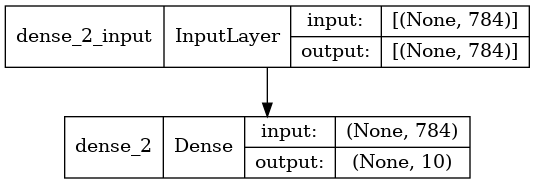

In [17]:
model.summary()
tf.keras.utils.plot_model(model, 'ML_model.png', show_shapes=True)

**Question** Why does the number of weights equal 7 850?

**Solution.** To produce its output, a dense layer multiplies the input by a matrix whose one dimension is the number of inputs and the other is the number of outputs. That matrix has 784 * 10 = 7 840 elements in this case. Then, the layer adds a bias to each output, so there are 10 biases. Together, there are 7 840 + 10 = 7 850 weights.

**Task.** In this example, the training and validation accuracies are very close to each other, which means that there is almost no overfitting. Why?

**Solution.** Because there are much more samples in the training dataset than there are model weights. So, the problem is overdetermined and there are not enough degrees of freedom to adjust the model too much to the training dataset.

## Training history

It is good to monitor the evolution of the loss function and the metric duriong the training

* inspect the content of the `history` variable initializez by the output of the `model.fit()` method
* plot the accuracy as a function of the epoch numer 

Content of the history object: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Accuracy on the traiing dataset: [0.9116500020027161, 0.9121999740600586, 0.9125499725341797, 0.9127166867256165, 0.9131666421890259, 0.9134833216667175, 0.9137666821479797, 0.9139500260353088, 0.9140166640281677, 0.9142333269119263]


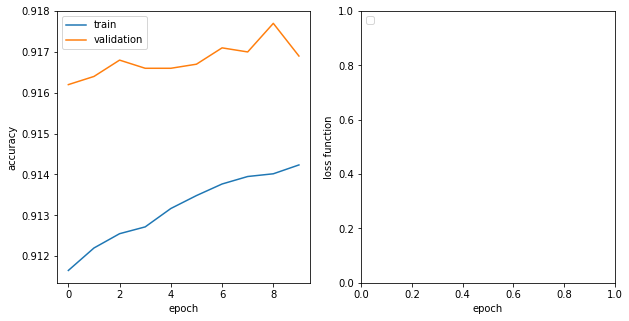

In [18]:
print(colored("Content of the history object:", "blue"),history.history.keys())
print(colored("Accuracy on the traiing dataset:","blue"), history.history['accuracy'])

def plotTrainingHistory(history):

    fig, axes= plt.subplots(1,2,figsize=(10,5))
    history = history.history
    axes[0].plot(history['accuracy'])
    axes[0].plot(history['val_accuracy'])
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['train', 'validation'], loc='upper left')

    axes[1].set_ylabel('loss function')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['train', 'validation'], loc='upper left')    
    
plotTrainingHistory(history)   

## <span style='color:red'> Please: </span> 

* finish the `plotTrainingHistory(history)` function by adding a plot for the loss function evolution  

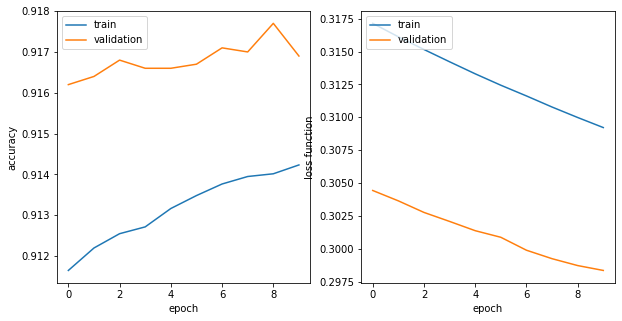

In [19]:
def plotTrainingHistory(history):

    fig, axes= plt.subplots(1,2,figsize=(10,5))
    history = history.history
    axes[0].plot(history['accuracy'])
    axes[0].plot(history['val_accuracy'])
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['train', 'validation'], loc='upper left')

    axes[1].plot(history['loss'])
    axes[1].plot(history['val_loss'])
    axes[1].set_ylabel('loss function')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['train', 'validation'], loc='upper left')  
    
plotTrainingHistory(history)      

## Model extension

* add a second layer, **a hidden layer**, between the input, and output layers
* choosing the hidden layers parameters is part of the ML art. A rule of thumb for the number of neurons in that layer may be, the geometric mean of the number of inputs and outputs, that is:

$$
\sqrt{10 \cdot 784} = 89
$$

or the next power of two, that is, 128. 
* use the sigmoid activation function for the hidden layer

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 856us/step - loss: 0.2451 - accuracy: 0.9297
CPU times: user 1min 37s, sys: 8.55 s, total: 1min 45s
Wall time: 1min 3s


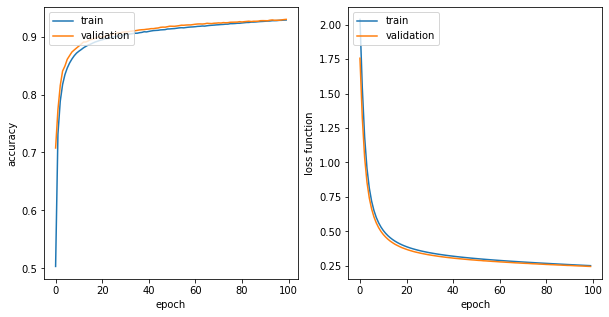

In [20]:
%%time 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('sgd',
              'sparse_categorical_crossentropy',
              'accuracy')

history = model.fit(DATA0, TARGET0, batch_size = 128, epochs = 100, validation_data = (DATA1, TARGET1), verbose=0)

model.summary()
model.evaluate(DATA0, TARGET0);
model.evaluate(DATA1, TARGET1);
tf.keras.utils.plot_model(model, 'ML_model.png', show_shapes=True)
plotTrainingHistory(history)   

**Task.** Explain the number of weights in this network.

**Solution.** The first layer has 784 inputs and 128 outputs, so 784 * 128 + 128 = 100 480 weights. The second layer has 128 inputs and 10 outputs, so 128 * 10 + 10 = 1 290 weights. Together, there are 100 480 + 1 290 = 101 770 weights.

Adding the second layer improved the accuracy surprisingly little. 

* change the activation function of the added layer to `relu`, which is one of the most used:

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 800us/step - loss: 0.1036 - accuracy: 0.9700
CPU times: user 1min 41s, sys: 9.09 s, total: 1min 50s
Wall time: 1min 5s


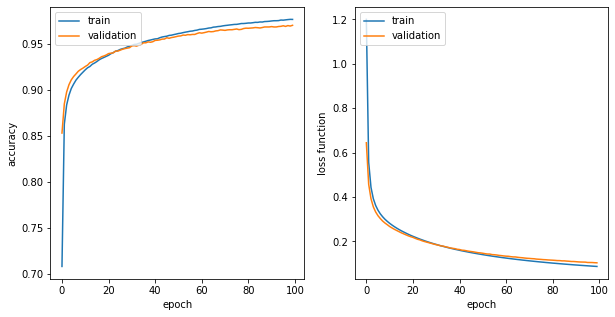

In [21]:
%%time

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('sgd',
              'sparse_categorical_crossentropy',
              'accuracy')

history_sgd = model.fit(DATA0, TARGET0, batch_size = 128, epochs = 100, validation_data = (DATA1, TARGET1), verbose=0)
model.summary()
model.evaluate(DATA0, TARGET0);
model.evaluate(DATA1, TARGET1);
plotTrainingHistory(history_sgd)   

Now the improvement is very significant. The difference is because sigmoid saturates on both sides, yields vanishing gradients there, and effectively stucks the minimization. Relu does not saturate on the positive side and causes no such problems.

**Question.** The training takes less physical time with the relu activation. Why?

**Solution.** Relu does not contain nonlinear functions, like exponents, and is therefore faster to calculate and differentiate.

* change the optimizer algorithm to `Adaptive Momentum (Adam)`, which is one of the best and most used:

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 887us/step - loss: 0.1283 - accuracy: 0.9809
SGD optimizer final validation accuracy: 0.9700000286102295
ADAM optimizer final validation accuracy: 0.98089998960495
CPU times: user 1min 47s, sys: 9.09 s, total: 1min 56s
Wall time: 1min 9s


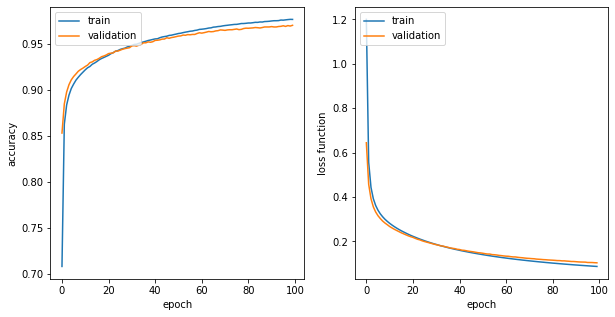

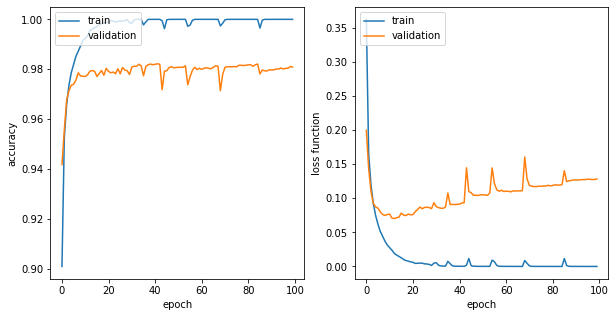

In [22]:
%%time

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

history_adam = model.fit(DATA0, TARGET0, batch_size = 128, epochs = 100, validation_data = (DATA1, TARGET1), verbose=0)
model.summary()
model.evaluate(DATA0, TARGET0);
model.evaluate(DATA1, TARGET1);

print(colored("SGD optimizer final validation accuracy:","blue"), history_sgd.history["val_accuracy"][-1])
plotTrainingHistory(history_sgd)

print(colored("ADAM optimizer final validation accuracy:","blue"), history_adam.history["val_accuracy"][-1])
plotTrainingHistory(history_adam)

The final validation accuracy is only slightly higher but Adam achieved it in a much smaller number of epochs than SGD. From now on, we will always use the Adam optimizer and the relu activation function, and 32 epochs.

It is impressive that such a simple two-layer network correctly classifies 100% of the training dataset. 
**This means that the lower accuracy on the validation dataset is uniquely due to overfitting.**

**Question.** Why is there a significant overfitting here?

**Solution.** Because the number of model weights is significantly higher than the number of training samples. The problem is now underdetermined and gives room for excessive adjustment of the model weights to this particular training dataset.

Since there is overfitting caused by the already large number of model weights, it is dubious whether adding a third layer would still improve things, because it will increase the number of weights even more. Check this by adding a third layer. 

## <span style='color:red'> Please: </span> 

* create a model with three layers with 256, 65, 10 neutrons
* the last layer is the output layer, so it should have `activation = 'softmax'
* other layers should have activation = 'relu'
* use `adam` optimizer
* use `batch_size = 32`, and run the optimization for `epochs = 32`
* submit the accuaracy wih three digits precision: 0.XXX on the validation dataset [here](https://docs.google.com/forms/d/1ZqW4bwP9jVepDUWlHnBkWzrlzQrVkyujjnsrNxoBPrs)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 956us/step - loss: 0.1553 - accuracy: 0.9802


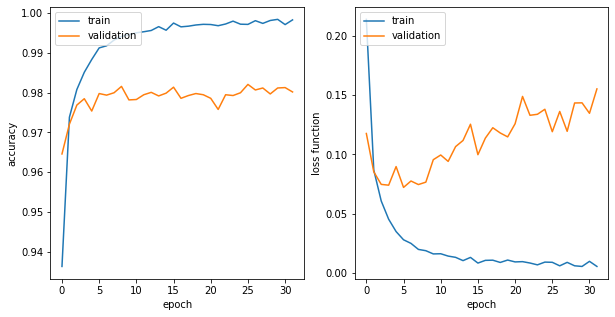

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

history = model.fit(DATA0, TARGET0, batch_size = 32, epochs = 32, validation_data = (DATA1, TARGET1), verbose=0)
model.summary()
model.evaluate(DATA0, TARGET0);
model.evaluate(DATA1, TARGET1);
plotTrainingHistory(history)   

Adding the third layer improved the validation accuracy only slightly. But this is still an achievement because the closer we are to 100%, the more difficult it is to gain accuracy. Note that even a slight increase in accuracy leads to a significant reduction in the error rate, which is complementary to accuracy. Here for instance, increasing the accuracy from 0.980 to 0.985 reduces the error rate from 2% to 1.5%, that is, by a factor of 4/3.

## <span style='color:red'> Please: </span> 

* check that adding a fourth dense layer does not further increase the validation accuracy.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 953us/step - loss: 0.1269 - accuracy: 0.9829
CPU times: user 2min 24s, sys: 11.3 s, total: 2min 36s
Wall time: 1min 37s


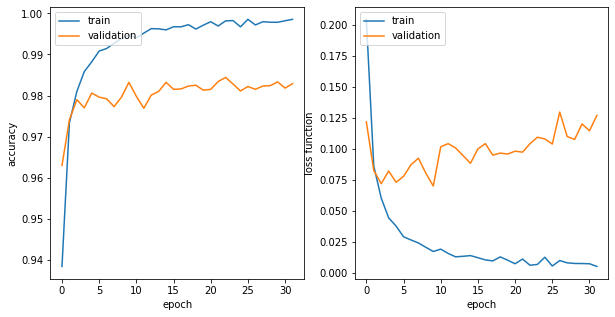

In [24]:
%%time 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

history = model.fit(DATA0, TARGET0, batch_size = 32, epochs = 32, validation_data = (DATA1, TARGET1), verbose=0)

model.summary()
model.evaluate(DATA0, TARGET0);
model.evaluate(DATA1, TARGET1);
plotTrainingHistory(history)   

Since adding more dense layers does not further increase the validation accuracy, we must resort to other means. 

There are two paths:

* model regularisation - dedicated techniques to reduce overfitting, 
* model modification - use of different type of layers. The `convolutional layers` are specifically designed for image analyses.

..but this is a story for an medium level ML Workshop...

## Model deployment

After obtaining a satifcatory model, one still need to deliver it to "client". Often this requires some additional work.

* please test the model on your own digits.

In [ ]:
import os 

def testModelOnMyDigits(model):    
    #Code created by M.Fila@UW
    if not os.path.isdir("colab_freehands"):
        !git clone https://github.com/m-fila/colab_freehands.git

    from colab_freehands.canvas import Canvas  
    canvas = Canvas(line_width=2)
    example = (
        canvas.to_array(size=(20, 20), margin=(4, 4), dtype=np.float32, weighted=True) / 255
    )
    predictions = model(np.expand_dims(example, (0, -1)))
    plt.imshow(example, cmap="gray")
    plt.show()
    print(
        "Predicted class: {} ({:.0f}%)".format(
            np.argmax(predictions), np.max(predictions) * 100
        )
    )
    
testModelOnMyDigits(model)    